**1. IMPORTER LES LIBRAIRIES**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import datetime

from wordcloud import WordCloud

import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

**2. IMPORTER LE FICHIER**

In [65]:
df = pd.read_csv("2. Pre-processing & Feature engineering_1.csv")
# Remettre la variable 'date_experience' au format datetime
df['date_experience'] = pd.to_datetime(df['date_experience'])

df.info()
display(df.head())
print("Nombre de valeurs nulles :", df.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73846 entries, 0 to 73845
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   nom               73846 non-null  object        
 1   notes             73846 non-null  int64         
 2   pays              73846 non-null  object        
 3   nbr_avis          73846 non-null  int64         
 4   date_publication  73846 non-null  object        
 5   date_experience   73846 non-null  datetime64[ns]
 6   commentaire       73846 non-null  object        
 7   titre             73846 non-null  object        
 8   commentaires      73846 non-null  object        
 9   ponctuation       73846 non-null  int64         
 10  sentiment         73846 non-null  float64       
 11  sentiment_labels  73846 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 6.8+ MB


nom  notes pays  nbr_avis date_publication date_experience  \
0   GUY PEYRONNENC      5   FR         7       2 days ago      2024-04-09   
1     bernard auge      5   FR         1       4 days ago      2024-04-07   
2      alain bruno      5   FR         3     Mar 26, 2024      2024-03-20   
3   Martin Maurice      1   FR        41       2 days ago      2024-04-09   
4  PHILIPPE PLENET      5   FR        13      7 hours ago      2024-04-11   

                                         commentaire  \
0                          commande simple et rapide   
1                                   tres bon service   
2                                         No comment   
3  Cdiscount cautionne l'escroquerie en ce sens o...   
4  Simple, rapide, prix raisonnables et €commerce...   

                                      titre  \
0                commandee simple et rapide   
1                          rapide et simple   
2                     Honorable bon suivi !   
3  Cdiscount cautionne l'escroquerie en ce…   
4                                    Simple   

                                        commentaires  ponctuation  sentiment  \
0  commandee simple et rapide commande simple et ...            0   0.225000   
1                  rapide et simple tres bon service            0   0.483333   
2                              Honorable bon suivi !            1   0.687500   
3  Cdiscount cautionne l'escroquerie en ce… Cdisc...            1   0.450000   
4  Simple Simple, rapide, prix raisonnables et €c...            0   0.190000   

  sentiment_labels  
0          Positif  
1          Positif  
2          Positif  
3          Positif  
4          Positif

Nombre de valeurs nulles : 0


**3. VISUALISATION 'NOTES'**

*1) Distribution de la variable cible 'notes'*

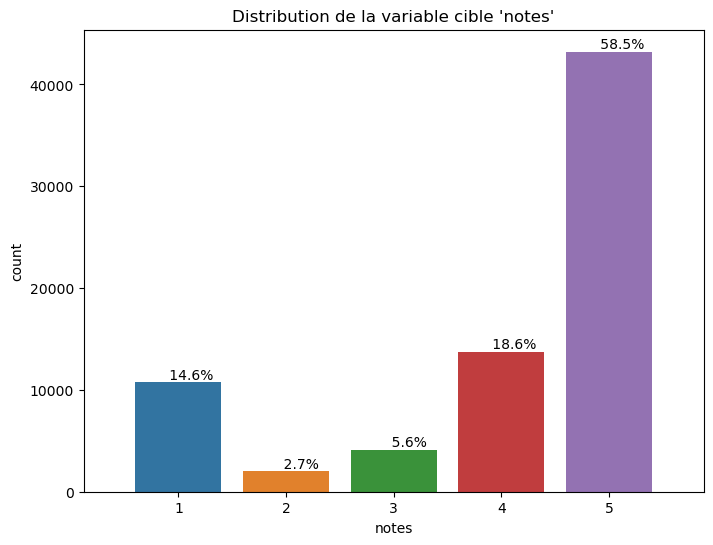

notes
5    43209
4    13751
1    10773
3     4122
2     1991
Name: count, dtype: int64

In [66]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data=df, x='notes')
plt.title("Distribution de la variable cible 'notes'")

total = df['notes'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:10.1f}%')
ax.margins(x=0.1)
plt.show()

display(df['notes'].value_counts())

*2) Nombre de notes en fonction des années de la variable 'date_experience'*

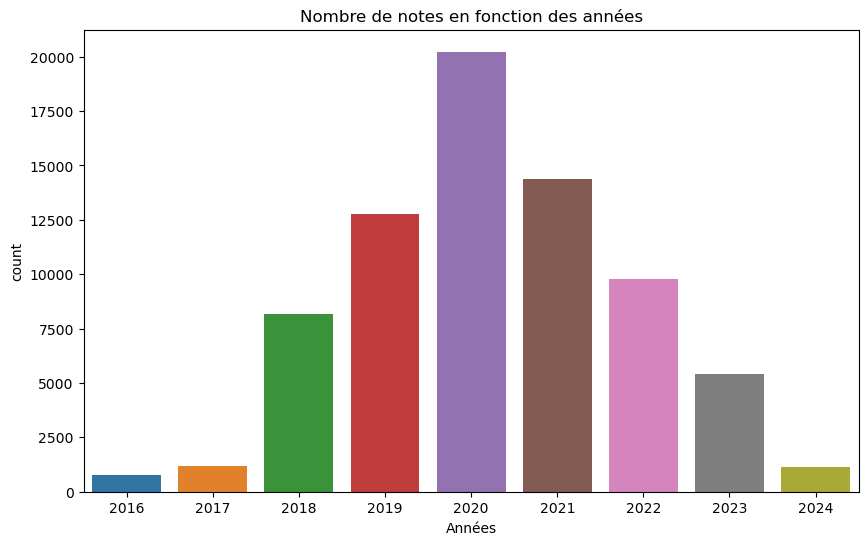

In [67]:
plt.figure(figsize = (10,6))
sns.countplot(x = df['date_experience'].dt.year)
plt.title("Nombre de notes en fonction des années")
plt.xlabel('Années') 
plt.show()

*3) Distribution de la variable cible 'notes' en fonction des années de la variable 'date_experience'*

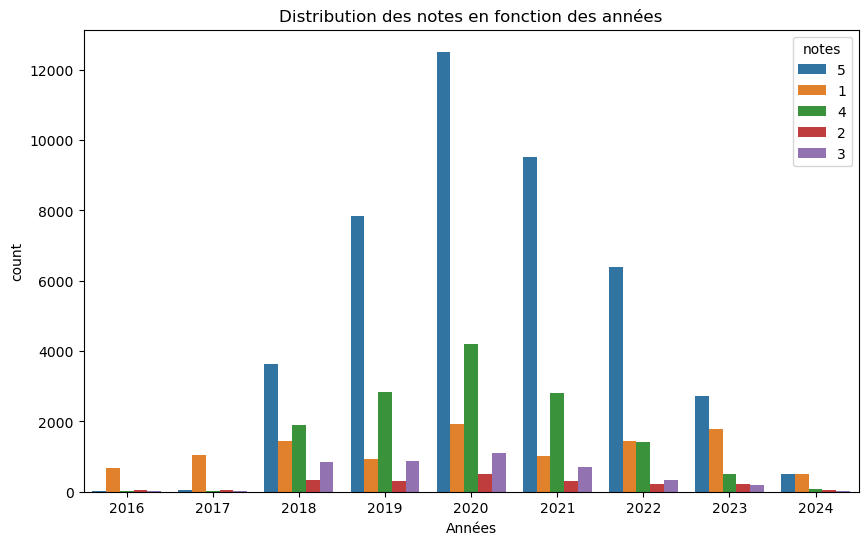

In [68]:
plt.figure(figsize = (10,6))
sns.countplot(x = df['date_experience'].dt.year, hue=df['notes'].astype(str))
plt.title("Distribution des notes en fonction des années")
plt.xlabel('Années') 
plt.show()

*4) Nombre de notes en fonction des mois de la variable 'date_experience'*

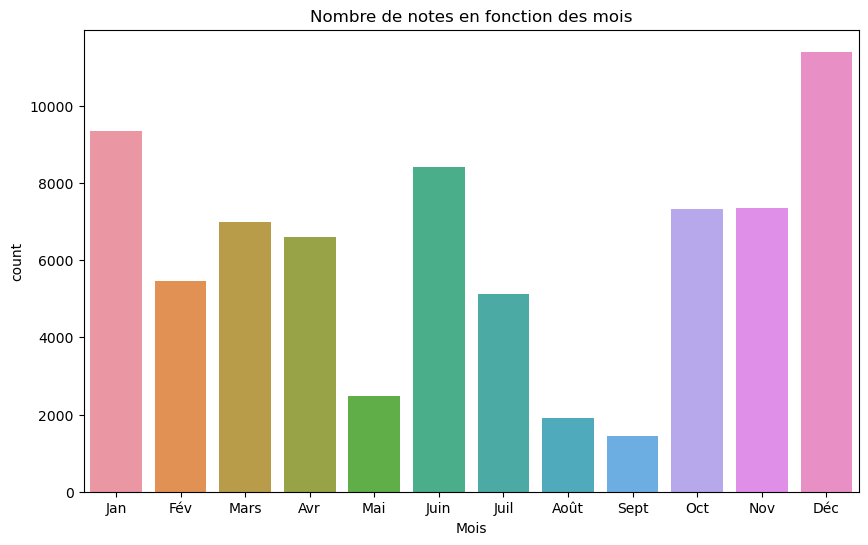

In [69]:
plt.figure(figsize = (10,6))
sns.countplot(x = df['date_experience'].dt.month)
plt.xticks(range(12), ['Jan', 'Fév', 'Mars', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Déc'])
plt.title("Nombre de notes en fonction des mois")
plt.xlabel('Mois') 
plt.show()

*5) Distribution de la variable cible 'notes' en fonction des mois de la variable 'date_experience'*

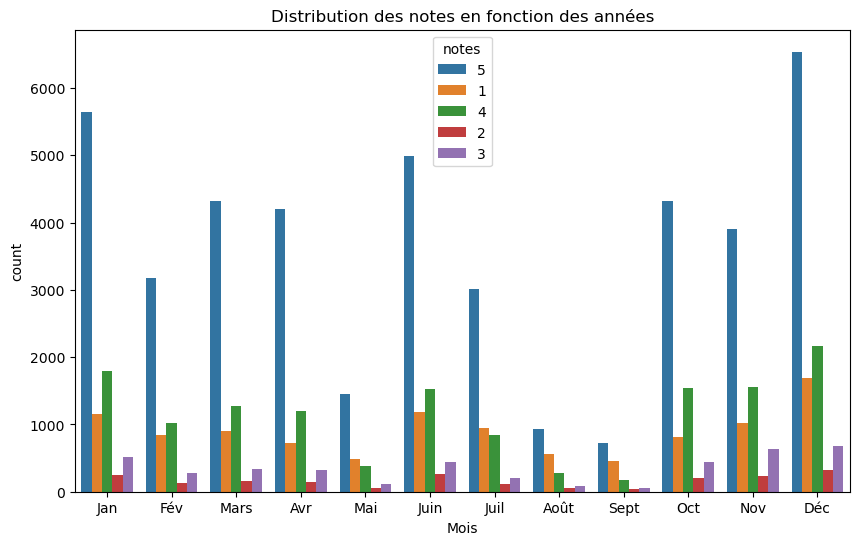

In [70]:
plt.figure(figsize = (10,6))
sns.countplot(x = df['date_experience'].dt.month, hue=df['notes'].astype(str))
plt.xticks(range(12), ['Jan', 'Fév', 'Mars', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Déc'])
plt.title("Distribution des notes en fonction des années")
plt.xlabel('Mois') 
plt.show()

**4. VISUALISATION 'NBR_AVIS'**

In [71]:
# Analyse de la variable 'nbr_avis'
print(df['nbr_avis'].describe())
seuil_max = df['nbr_avis'].quantile(q=0.75) + 1.5 * (df['nbr_avis'].quantile(q=0.75) - df['nbr_avis'].quantile(q=0.25))
print("seuil_max =", seuil_max)

count    73846.000000
mean         3.997210
std          5.042182
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        176.000000
Name: nbr_avis, dtype: float64
seuil_max = 11.0


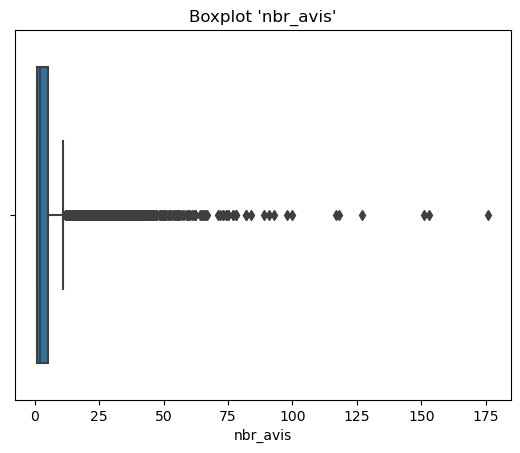

In [72]:
sns.boxplot(x = df['nbr_avis'])
plt.title("Boxplot 'nbr_avis'")
plt.show()

In [73]:
# Suppression des valeurs extrêmes de 'nbr_avis'
new_df = df.loc[(df['nbr_avis'] <= 11)] # 11 = seuil à partir duquel les valeurs sont considérées comme aberrantes

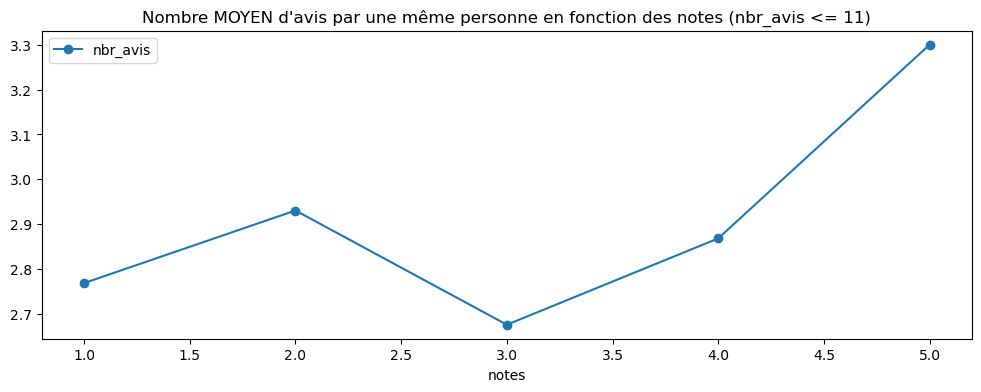

In [74]:
group_notes_nbr_avis = new_df.groupby(["notes"]).agg({"nbr_avis": 'mean'})
group_notes_nbr_avis
group_notes_nbr_avis.plot(figsize = (12, 4), style = 'o-')
plt.title("Nombre MOYEN d'avis par une même personne en fonction des notes (nbr_avis <= 11)")
plt.show()

In [75]:
# Corrélation 'notes' / 'nbr_avis'
print("Corrélation 'notes' et 'nbr_avis' :\n" , np.corrcoef(new_df['notes'], new_df['nbr_avis']))

Corrélation 'notes' et 'nbr_avis' :
 [[1.         0.08535446]
 [0.08535446 1.        ]]


**5. VISUALISATION 'PONCTUATION'**

In [76]:
# Analyse de la variable 'ponctuation'
display(df['ponctuation'].describe())

# On définit un seuil_max contenant le nombre de ponctuations maximum pour 99% des individus
print("seuil_max =", df['nbr_avis'].quantile(q=0.99)) # seuil_max = 24
new_df2 = df.loc[(df['ponctuation'] < 24)]

count    73846.000000
mean         0.797132
std          4.672003
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        949.000000
Name: ponctuation, dtype: float64

seuil_max = 24.0


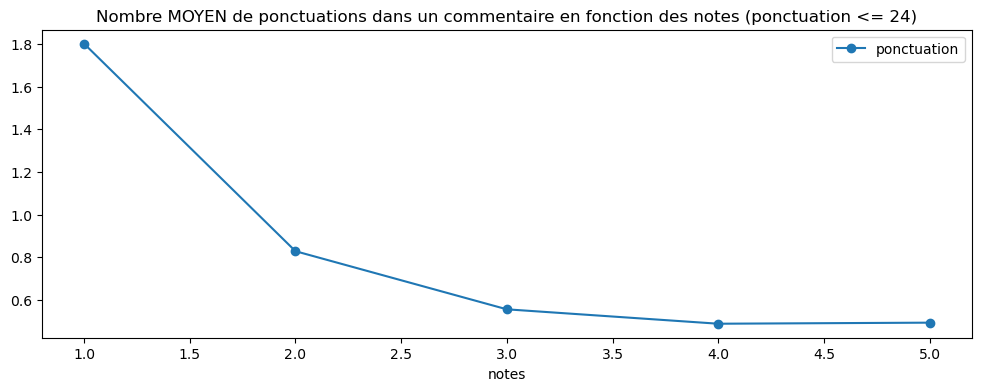

In [77]:
group_notes_ponctuation = new_df2.groupby(["notes"]).agg({"ponctuation": 'mean'})
group_notes_ponctuation
group_notes_ponctuation.plot(figsize = (12, 4), style = 'o-')
plt.title("Nombre MOYEN de ponctuations dans un commentaire en fonction des notes (ponctuation <= 24)")
plt.show()

In [78]:
# Corrélation 'notes' / 'ponctuation'
print("Corrélation 'notes' et 'ponctuation' :\n", np.corrcoef(new_df2['notes'], new_df2['ponctuation']))

Corrélation 'notes' et 'ponctuation' :
 [[ 1.         -0.20237335]
 [-0.20237335  1.        ]]


**6. WORDCLOUDS**

*STOP WORDS*

In [79]:
stop_words = set(stopwords.words('french'))
mots_vides = ["passé", "très", "trés", "discount", "commander", "commandé", "commandes", "pris", "heure", "pu", "veux", "commande", "d'achat", "n'y", "payer", "d'un", "d'une", "mail", "clients", "clientes", "cliente", "jours", "tre", "années", "annees", "moment", "faut", "temp", "part", "tré", "l'ensemble", "passer", "passe", "passé", "parfoi", "acheté", "acheter", "d'un", "l'on", "semaine", "minute", "suite", "nouveau", "euros", "demande", "demandé", "jour", "déjà", "année", "annee", "qu'on", "date", "avis", "m'a", "pri", "site", "lors", "numéro", "numero", "ca", "vraiment", "euro", "voir", "mois", "jamai", "j'ai", "n'ai", "disant", "trouve", "qu'ils", "qu'elles", "dit", "faire", "qu'il", "qu'elle", "n'est", "n'a", "client", "en", "EN", "En", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", ".", ",", "Je", "ans", "Cdisount", "CDISCOUNT", "cdiscount", "c'est", "s'est", 'Bonjour', 'bonjour', 'a', 'à', 'â', 'abord', 'afin', 'ah', 'ai', 'aie', 'ainsi', 'allaient', 'allo', 'allô´', 'allons', 'après', 'assez', 'attendu', 'au', 'aucun', 'aucune', 'aujourd', "aujourd'hui", 'auquel', 'aura', 'auront', 'aussi', 'autre', 'autres', 'aux', 'auxquelles', 'auxquels', 'avaient', 'avais', 'avait', 'avant', 'avec', 'avoir', 'ayant', 'b', 'bah', 'beaucoup', 'bien', 'bigre', 'boum', 'bravo', 'brrr', 'c', 'ça', 'car', 'ce', 'ceci', 'cela', 'celle', 'celle-ci', 'celle-là', 'celles', 'celles-ci', 'celles-là', 'celui', 'celui-ci', 'celui-là', 'cent', 'cependant', 'certain', 'certaine', 'certaines', 'certains', 'certes', 'ces', 'cet', 'cette', 'ceux', 'ceux-ci', 'ceux-là', 'chacun', 'chaque', 'cher', 'chère', 'chères', 'chers', 'chez', 'chiche', 'chut', 'ci', 'cinq', 'cinquantaine', 'cinquante', 'cinquantième', 'cinquième', 'clac', 'clic', 'combien', 'comme', 'comment', 'compris', 'concernant', 'contre', 'couic', 'crac', 'd', 'da', 'dans', 'de', 'debout', 'dedans', 'dehors', 'delà', 'depuis', 'derrière', 'des', 'dès', 'dèsormais', 'desquelles', 'desquels', 'dessous', 'dessus', 'deux', 'deuxième', 'deuxièmement', 'devant', 'devers', 'devra', 'diffèrent', 'diffèrente', 'diffèrentes', 'diffèrents', 'dire', 'divers', 'diverse', 'diverses', 'dix', 'dix-huit', 'dixième', 'dix-neuf', 'dix-sept', 'doit', 'doivent', 'donc', 'dont', 'douze', 'douzième', 'dring', 'du', 'duquel', 'durant', 'e', 'effet', 'eh', 'elle', 'elle-même', 'elles', 'elles-mêmes', 'en', 'encore', 'entre', 'envers', 'environ', 'es', 'ès', 'est', 'et', 'etant', 'étaient', 'étais', 'était', 'étant', 'etc', 'été', 'etre', 'être', 'eu', 'euh', 'eux', 'eux-mêmes', 'excepté', 'f', 'façon', 'fais', 'faisaient', 'faisant', 'fait', 'feront', 'fi', 'flac', 'floc', 'font', 'g', 'gens', 'h', 'ha', 'hé', 'hein', 'hélas', 'hem', 'hep', 'hi', 'ho', 'holà', 'hop', 'hormis', 'hors', 'hou', 'houp', 'hue', 'hui', 'huit', 'huitième', 'hum', 'hurrah', 'i', 'il', 'ils', 'importe', 'j', 'je', 'jusqu', 'jusque', 'k', 'l', 'la', 'là', 'laquelle', 'las', 'le', 'lequel', 'les', 'lès', 'lesquelles', 'lesquels', 'leur', 'leurs', 'longtemps', 'lorsque', 'lui', 'lui-même', 'm', 'ma', 'maint', 'mais', 'malgré', 'me', 'même', 'mêmes', 'merci', 'mes', 'mien', 'mienne', 'miennes', 'miens', 'mille', 'mince', 'moi', 'moi-même', 'moins', 'mon', 'moyennant', 'n', 'na', 'ne', 'néanmoins', 'neuf', 'neuvième', 'ni', 'nombreuses', 'nombreux', 'non', 'nos', 'notre', 'nôtre', 'nôtres', 'nous', 'nous-mêmes', 'nul', 'o', 'ô', 'oh', 'ohé', 'olé', 'ollé', 'on', 'ont', 'onze', 'onzième', 'ore', 'ou', 'où', 'ouf', 'ouias', 'oust', 'ouste', 'outre', 'p', 'paf', 'pan', 'par', 'parmi', 'partant', 'particulier', 'particulière', 'particulièrement', 'pas', 'passé', 'pendant', 'personne', 'peu', 'peut', 'peuvent', 'peux', 'pff', 'pfft', 'pfut', 'pif', 'plein', 'plouf', 'plus', 'plusieurs', 'plutôt', 'pouah', 'pour', 'pourquoi', 'premier', 'première', 'premièrement', 'près', 'proche', 'psitt', 'puisque', 'q', 'qu', 'quand', 'quant', 'quanta', 'quant-à-soi', 'quarante', 'quatorze', 'quatre', 'quatre-vingt', 'quatrième', 'quatrièmement', 'que', 'quel', 'quelconque', 'quelle', 'quelles', 'quelque', 'quelques', "quelqu'un", 'quels', 'qui', 'quiconque', 'quinze', 'quoi', 'quoique', 'r', 'revoici', 'revoilà', 'rien', 's', 'sa', 'sacrebleu', 'sans', 'sapristi', 'sauf', 'se', 'seize', 'selon', 'sept', 'septième', 'sera', 'seront', 'ses', 'si', 'sien', 'sienne', 'siennes', 'siens', 'sinon', 'six', 'sixième', 'soi', 'soi-même', 'soit', 'soixante', 'son', 'sont', 'sous', 'stop', 'suis', 'suivant', 'sur', 'surtout', 't', 'ta', 'tac', 'tant', 'te', 'té', 'tel', 'telle', 'tellement', 'telles', 'tels', 'tenant', 'tes', 'tic', 'tien', 'tienne', 'tiennes', 'tiens', 'toc', 'toi', 'toi-même', 'ton', 'touchant', 'toujours', 'tous', 'tout', 'toute', 'toutes', 'treize', 'trente', 'très', 'trois', 'troisième', 'troisièmement', 'trop', 'tsoin', 'tsouin', 'tu', 'u', 'un', 'une', 'unes', 'uns', 'v', 'va', 'vais', 'vas', 'vé', 'vers', 'via', 'vif', 'vifs', 'vingt', 'vivat', 'vive', 'vives', 'vlan', 'voici', 'voilà', 'vont', 'vos', 'votre', 'vôtre', 'vôtres', 'vous', 'vous-mêmes', 'vu', 'w', 'x', 'y', 'z', 'zut', 'alors', 'aucuns', 'bon', 'devrait', 'dos', 'droite', 'début', 'essai', 'faites', 'fois', 'force', 'haut', 'ici', 'juste', 'maintenant', 'mine', 'mot', 'nommés', 'nouveaux', 'parce', 'parole', 'personnes', 'pièce', 'plupart', 'seulement', 'soyez', 'sujet', 'tandis', 'valeur', 'voie', 'voient', 'état', 'étions']
stop_words.update(mots_vides)

*Fonction pour afficher les WordClouds*

In [80]:
def afficher_wordclouds(colonne_dataframe) :
    text = ""
    for comment in colonne_dataframe :
        text += comment

    wc = WordCloud(width=800, height=400, background_color="black", 
                   max_words=100, stopwords=stop_words, max_font_size=70, random_state=42)
    plt.figure(figsize= (20,10))
    wc.generate(text)
    plt.imshow(wc)
    plt.show()

*1) WORDCLOUD 1 ETOILE*

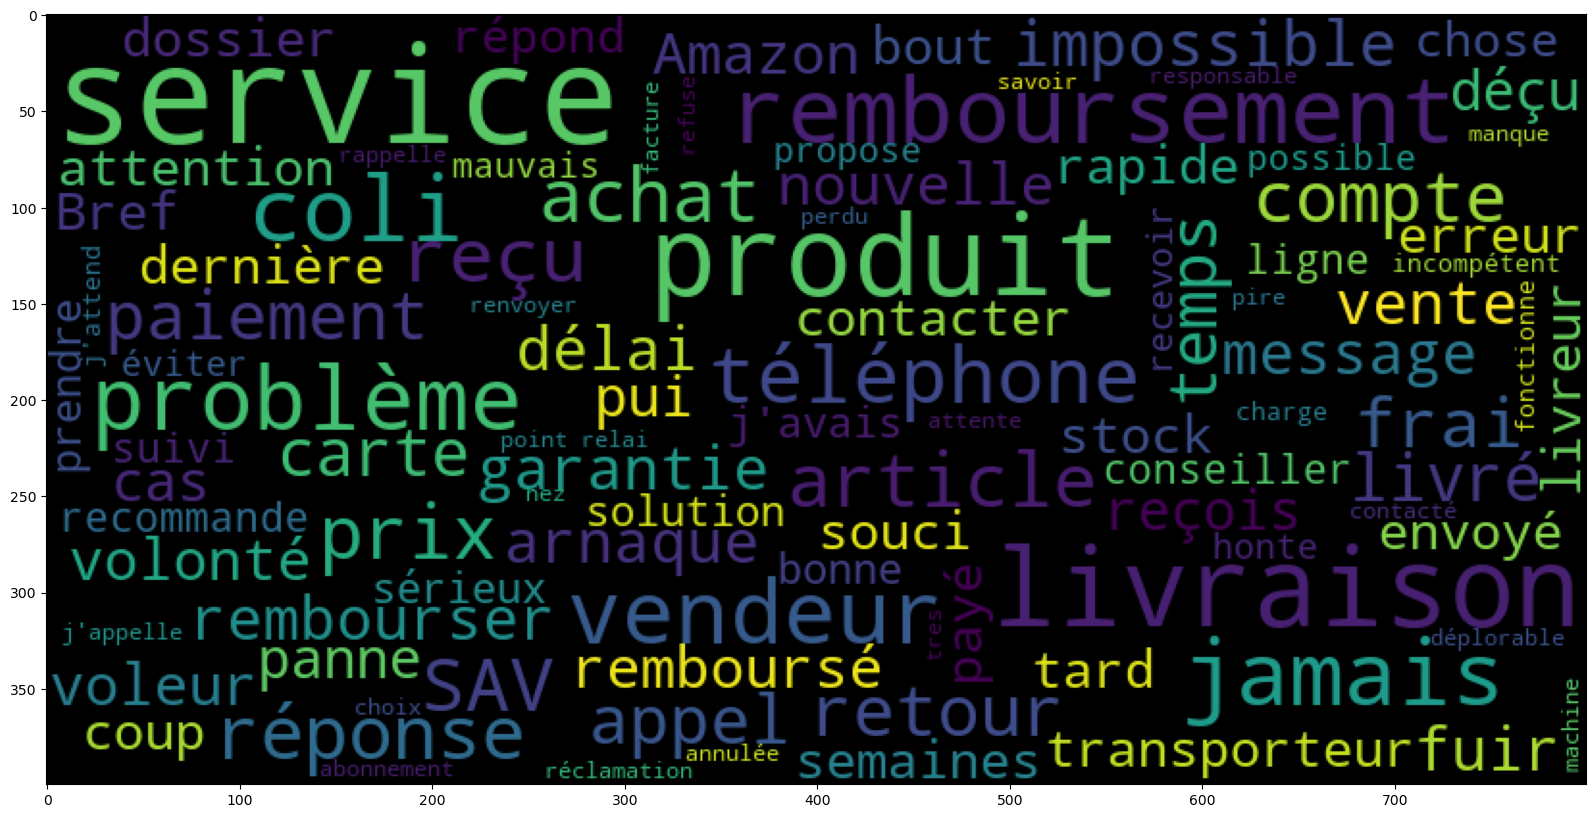

In [81]:
df_1 = df['commentaires'].loc[(df['notes'] == 1)]
afficher_wordclouds(df_1)

*2) WORDCLOUD 2 ETOILES*

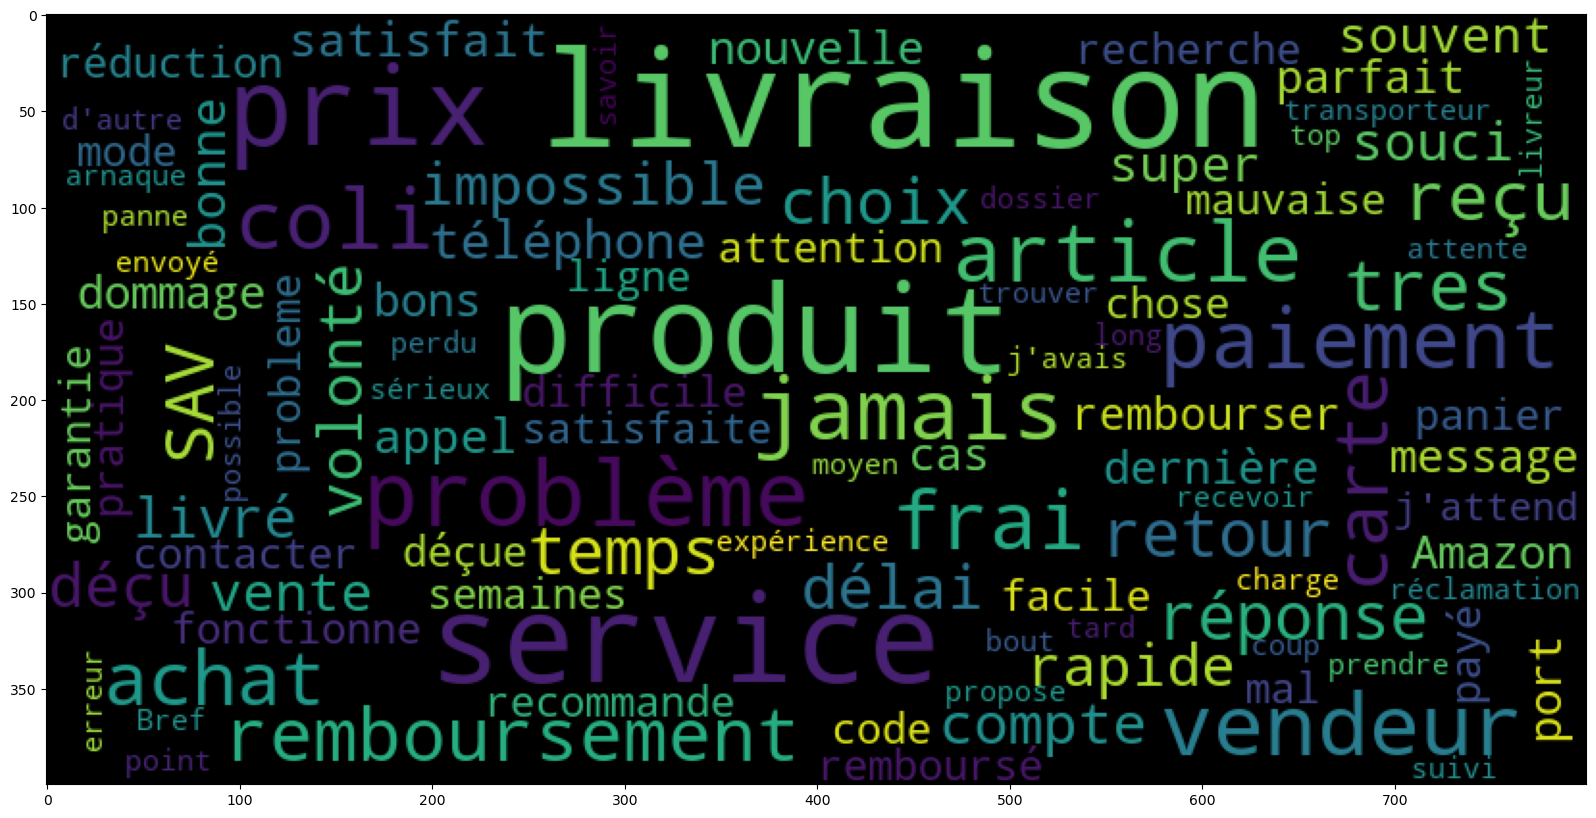

In [82]:
df_2 = df['commentaires'].loc[(df['notes'] == 2)]
afficher_wordclouds(df_2)

*3) WORDCLOUD 3 ETOILES*

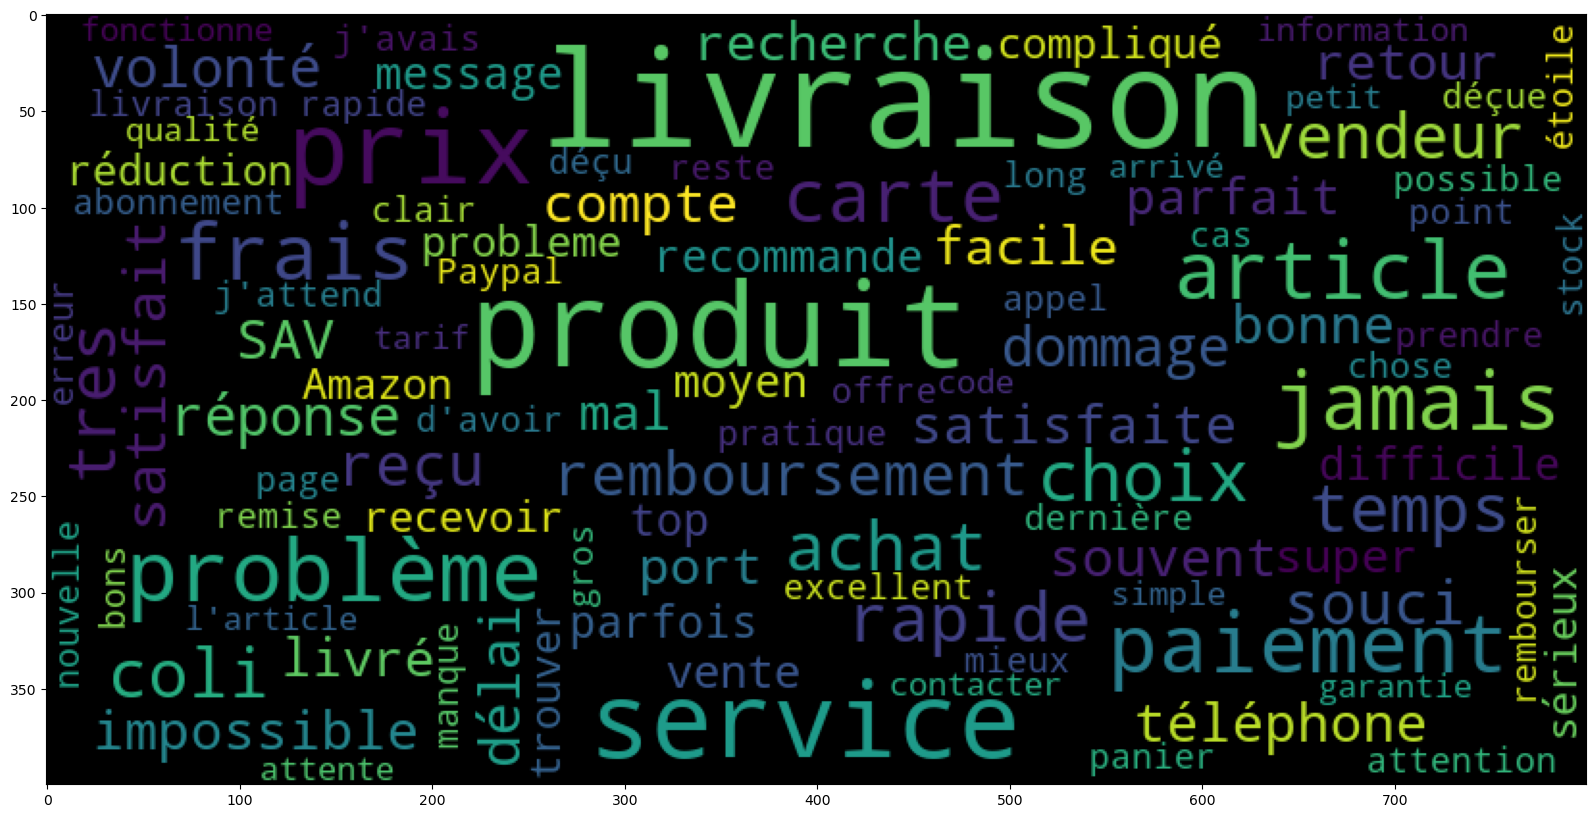

In [83]:
df_3 = df['commentaires'].loc[(df['notes'] == 3)]
afficher_wordclouds(df_3)

*4) WORDCLOUD 4 ETOILES*

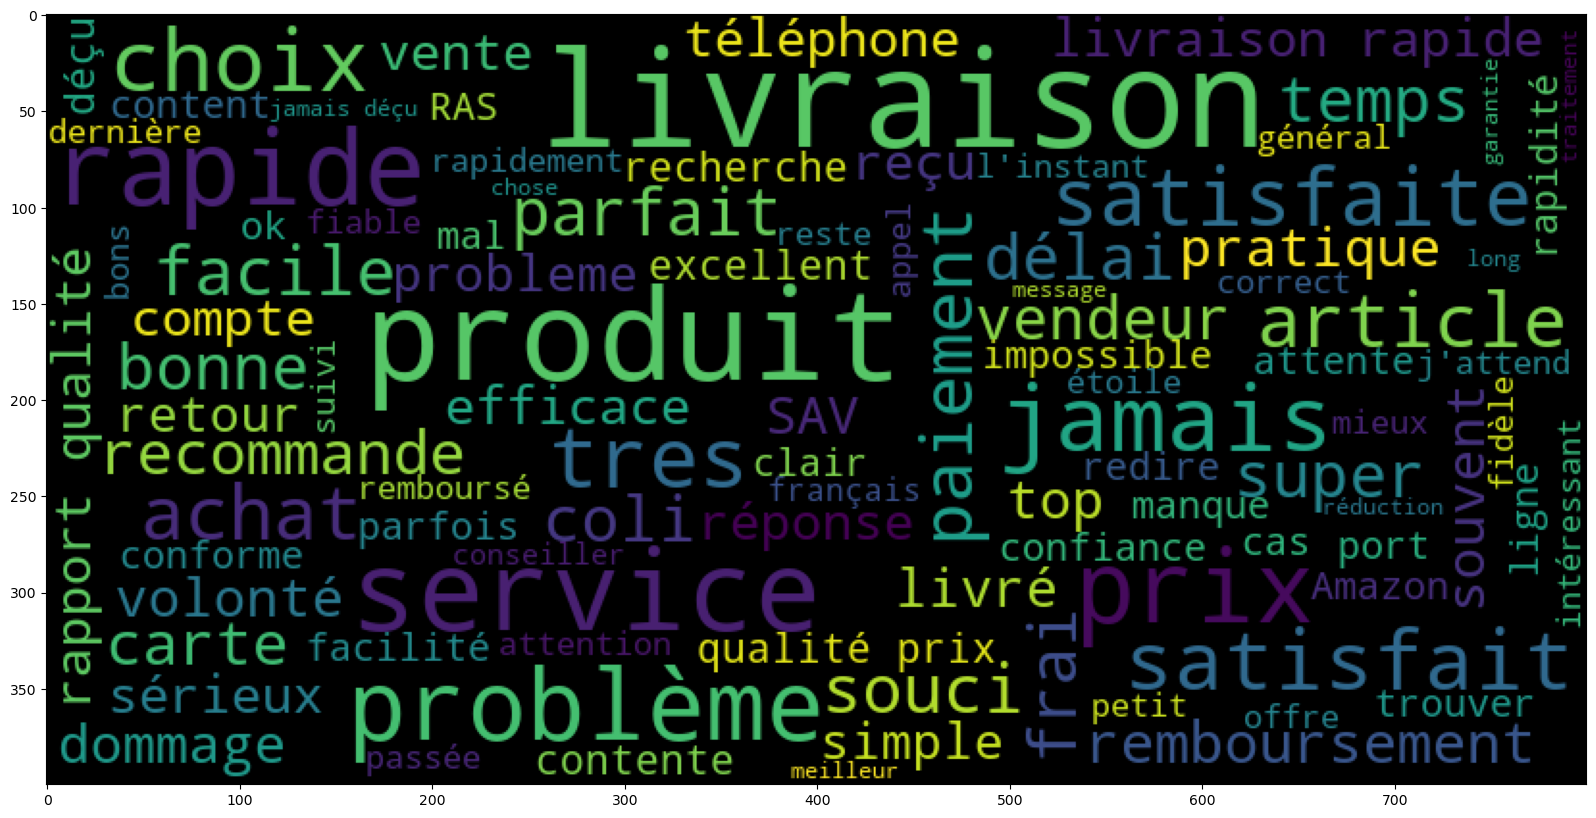

In [84]:
df_4 = df['commentaires'].loc[(df['notes'] == 4)]
afficher_wordclouds(df_4)

*5) WORDCLOUD 5 ETOILES*

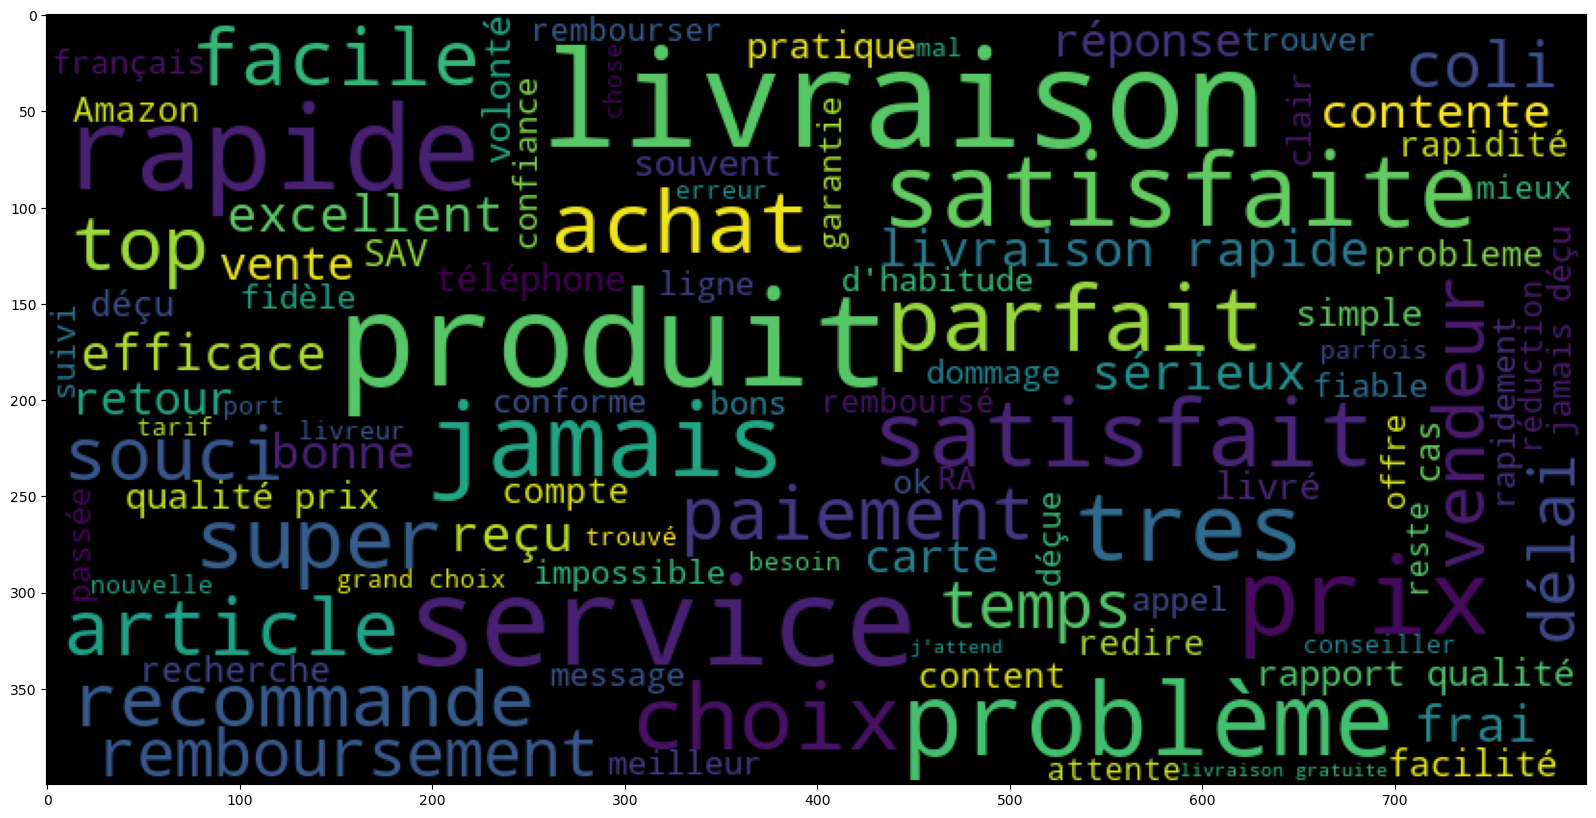

In [85]:
df_5 = df['commentaires'].loc[(df['notes'] == 5)]
afficher_wordclouds(df_5)

**7. VISUALISATION 'SENTIMENT'**

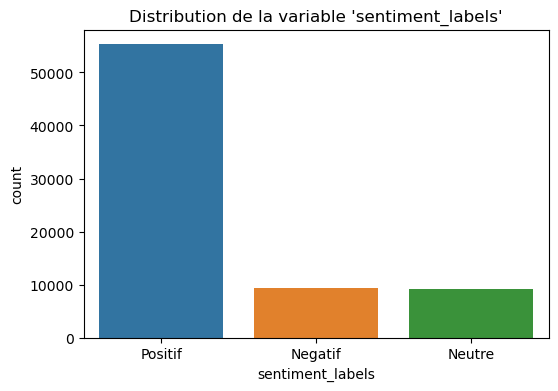

In [86]:
plt.figure(figsize = (6,4))
sns.countplot(x ='sentiment_labels', data = df)
plt.title("Distribution de la variable 'sentiment_labels'")
plt.show()

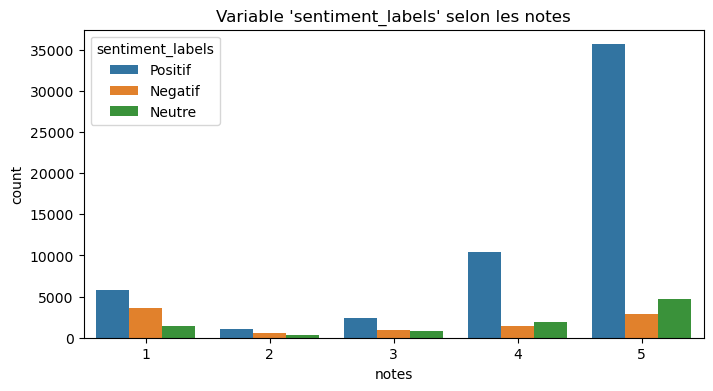

In [87]:
# Distribution de la variable 'sentiment' selon la variable 'notes'
plt.figure(figsize = (8,4))
sns.countplot(x = 'notes', hue = 'sentiment_labels', data = df)
plt.title("Variable 'sentiment_labels' selon les notes")
plt.show()

In [88]:
# Corrélation 'notes' / 'nbr_avis'
print("Corrélation 'notes' et 'sentiment' :\n" , np.corrcoef(df['notes'], df['sentiment']))

Corrélation 'notes' et 'sentiment' :
 [[1.         0.33488362]
 [0.33488362 1.        ]]
